In [53]:
import numpy as np
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns
stop_words = stopwords.words('russian')

from clustering import k_nearest_items, clusters_domain, preprocess_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
json_data = json.load(open("resule_parsing.json", "r", encoding="utf-8"))
out_product = json_data[20]
processed_data = preprocess_data(out_product)

In [13]:
nearest_dataframe = k_nearest_items(processed_data)

## строим облако слов по описания ближайших товаров - можно использовать при создании рекламы карточки

In [50]:
text = " ".join([i for i in nearest_dataframe.description if  i is not np.nan])
cloud = WordCloud(width=1920, height=1080, stopwords=stop_words,
                  background_color="rgba(255, 255, 255, 0)").generate(text)
cloud.to_file("tmp_files/world_cloud.png")
# background_color="rgba(255, 255, 255, 0)"
# plt.figure(figsize=(20, 14), dpi=400)
# plt.imshow(cloud)
# plt.savefig('tmp_files/world_cloud.png')

In [54]:
nearest_dataframe

,Unnamed: 0,url,price,old_price,order_count,celler_sold,celler_rating,name_comp,celler_mean_delivery_time,celler_percent_bad_products,...,search_category,meta_text_0,meta_text_1,meta_text_2,meta_text_3,sale_percent,percent_order_of_all_seller,not_info_old_price,not_info_order_count,celler_working_time_norm
75,75,https://www.wildberries.ru/catalog/171471305/d...,879.0,1999.000000,11914.127626,NaN,4.9,ЭлибЭКО,99.3,99.3,...,посуда,Дополнительная информация Материал посуды ABS-...,Дополнительная информация Материал посуды ABS-...,Габариты Длина упаковки 14 см Высота упаковки ...,NaN,0.439720,0.03029,False,True,5.0
1122,1122,https://www.wildberries.ru/catalog/171471142/d...,879.0,1999.000000,11914.127626,NaN,4.9,ЭлибЭКО,99.3,99.3,...,посуда,Дополнительная информация Вес товара с упаковк...,Дополнительная информация Вес товара с упаковк...,Габариты Длина упаковки 14 см Высота упаковки ...,NaN,0.439720,0.03029,False,True,5.0
173,173,https://www.wildberries.ru/catalog/171471378/d...,879.0,1999.000000,11914.127626,NaN,4.9,ЭлибЭКО,99.3,99.3,...,посуда,Дополнительная информация Материал посуды ABS-...,Дополнительная информация Материал посуды ABS-...,Габариты Длина упаковки 14 см Высота упаковки ...,NaN,0.439720,0.03029,False,True,5.0
795,795,https://www.wildberries.ru/catalog/171087020/d...,559.0,999.000000,11914.127626,NaN,4.9,ЭлибЭКО,99.3,99.3,...,посуда,Дополнительная информация Материал посуды ABS-...,Дополнительная информация Материал посуды ABS-...,Габариты Длина упаковки 10 см Высота упаковки ...,NaN,0.559560,0.03029,False,True,5.0
360,360,https://www.wildberries.ru/catalog/98169943/de...,2030.0,7000.000000,400.000000,NaN,4.9,ReliaKool,100.0,99.3,...,посуда,Дополнительная информация Особенности посуды С...,Дополнительная информация Особенности посуды С...,Габариты Длина упаковки 25 см Высота упаковки ...,NaN,0.290000,0.03029,False,False,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,https://www.wildberries.ru/catalog/11508304/de...,190.0,250.000000,600.000000,NaN,3.2,REV Ritter GmbH,98.5,99.3,...,лампочки,Дополнительная информация Эквивалент лампы нак...,Дополнительная информация Эквивалент лампы нак...,Габариты Высота предмета 6 см Вес с упаковкой ...,Общие характеристики Количество предметов в уп...,0.760000,0.03029,False,False,45.0
895,895,https://www.wildberries.ru/catalog/170647697/d...,2200.0,4890.000000,11914.127626,NaN,4.5,Ковалева Ирина Юрьевна,99.3,99.3,...,косметика,Дополнительная информация Объем товара 150 мл ...,Дополнительная информация Объем товара 150 мл ...,Габариты Длина упаковки 20 см Высота упаковки ...,NaN,0.449898,0.03029,False,True,26.0
600,600,https://www.wildberries.ru/catalog/169216066/d...,1200.0,2881.913265,11914.127626,NaN,3.6,СОКОЛ,96.5,99.3,...,бритва,Общие характеристики Количество предметов в уп...,Общие характеристики Количество предметов в уп...,Дополнительная информация Назначение косметиче...,Габариты Длина упаковки 11 см Высота упаковки ...,0.000000,0.03029,True,True,10.0
79,79,https://www.wildberries.ru/catalog/13394908/de...,275.0,550.000000,2000.000000,NaN,4.5,Энергосистемы и Технологии,89.0,99.3,...,лампочки,Габариты Вес с упаковкой (кг) 0.5 кг Длина упа...,Габариты Вес с упаковкой (кг) 0.5 кг Длина упа...,Дополнительная информация Тип лампы галогенова...,Технические особенности Мощность устройства 20...,0.500000,0.03029,False,False,69.0


In [82]:
nearest_dataframe["revenue"] = nearest_dataframe.order_count * nearest_dataframe.price

C:\Users\843E~1\AppData\Local\Temp/ipykernel_4136/1250530687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_dataframe["revenue"] = nearest_dataframe.order_count * nearest_dataframe.price


## смотрим на потенциал сферы - визуализируем распределение выручки за все время (кол-во продаж * цену)

In [131]:

our_revenue = out_product["price"] * out_product["order_count"] if out_product["order_count"] is not None else 0
revenue_median = nearest_dataframe.revenue.median()

percentile = sum(our_revenue < nearest_dataframe.revenue) / len(nearest_dataframe.revenue) * 100


comment = f"Ваша выручка по продукту выше чем у {percentile} похожих товаров. "
if percentile < 80:
    comment += "Мы поможем улучшить это число!"
else:
    comment += "Поздравляем! Это крутой результат!"

dct_revenue = {"nearest_revenues": list(nearest_dataframe.revenue),
                "our_revenue": our_revenue,
                "comment": comment
                }

<AxesSubplot:ylabel='Count'>

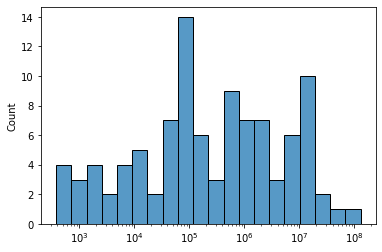

In [119]:
sns.histplot(dct_revenue["revenue"], log_scale=True, bins=20)


## посмотрим на среднюю цену товара у продавцов с макисамльной выручкой
## и просто покажем цены похожих товаров

In [106]:
best_price = nearest_dataframe.sort_values(by="revenue", ascending=False).iloc[:25].price.mean()
mean_price = nearest_dataframe.price.mean()
our_price = float(out_product["price"])

comment = f"Выша цена: {our_price}. Средняя цена в среди похожих товаров: {mean_price}; " \
          f"Цена у товаров с наибольшей выручкой: {best_price}"

comment2 = ""
if our_price < best_price * 0.9:
    comment2 = "Возможно, Вам стоит повысить цену или снизить издержки на доставку. Мы поможем Вам реализовать потенциал продукта с помощью AI технологий"
elif our_price > best_price * 1.1:
    comment2 += "Возможно, Вам стоит понизить цену или усилить маркетинговую часть, чтобы донести клиентам ценность продукта. Мы поможем Вам это сделать с помощью AI технологий"

dct_price = {"comment": comment, "personal_comment": comment2,
             "nearest_prices": list(nearest_dataframe.price), "our_price": out_product["price"]}

<AxesSubplot:ylabel='Count'>

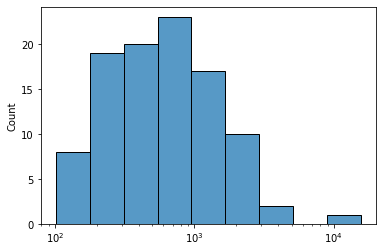

In [111]:
sns.histplot(dct_price["nearest_prices"], log_scale=True)

In [128]:
our_rating = out_product["celler_rating"]
percentile = sum(our_rating < nearest_dataframe.celler_rating) / len(nearest_dataframe.celler_rating) * 100

comment = ""
if percentile < 30:
    comment = f"Ваш рейтинг по карточке ниже чем у {100 - percentile} похожих товаров. Это может отталкивать потенциальных покупателей при выборе товара. Для увеличения рейтинга и повышения доверия к бренду можно воспользоваться нашим генератором положительных отзывов на товар"
elif percentile > 60:
    comment = f"Ваш рейтинг по карточке выше чем у {percentile} похожих товаров. Это высокий показатель, чтобы преобразовать его в высокую выручку рассмотрите возможность запустить рекламу на маркетплейсе и других популярных платформах"
else:
    comment = f"Ваш рейтинг по карточке близок к среднему, но для повышения рейтинга и попадания в выдачу можно воспользоваться нашим генератором положительных отзывов на товар"

dct_rating = {"comment": comment, "nearest_ratings": list(nearest_dataframe.celler_rating), "our_rating": our_rating}

In [132]:
analytics_result = {"rating": dct_rating, "price": dct_price, "revenue": dct_revenue}

In [133]:
dct_rating.keys()

dict_keys(['comment', 'nearest_ratings', 'our_rating'])

In [134]:
dct_price.keys()

dict_keys(['comment', 'personal_comment', 'nearest_prices', 'our_price'])

In [135]:
dct_revenue.keys()

dict_keys(['nearest_revenues', 'our_revenue', 'comment'])

In [136]:
from get_analytics import get_analytics

In [137]:
json_data = json.load(open("resule_parsing.json", "r", encoding="utf-8"))
out_product = json_data[20]

In [141]:
json.dump(get_analytics(out_product),
          open("analytic_answer_result.json", "w", encoding="utf-8"),
          ensure_ascii=False,
          indent=4)

E:\DIR_python_projects\generation_hack\ml_analytics\get_analytics.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_dataframe["revenue"] = nearest_dataframe.order_count * nearest_dataframe.price


In [13]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [20]:
import json


json_data = json.load(open("resule_parsing_new.json", "r", encoding="utf-8"))

In [15]:
from get_regressor_predict_by_product import get_predict

In [21]:
from copy import copy
from PIL import Image
sample = copy(json_data[10])
image = Image.open("img.JPG")

In [22]:
get_predict(sample, image)

14830412.318821222